In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes = True)
np.random.seed(sum(map(ord,'distributions')))
tips = sns.load_dataset('tips')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


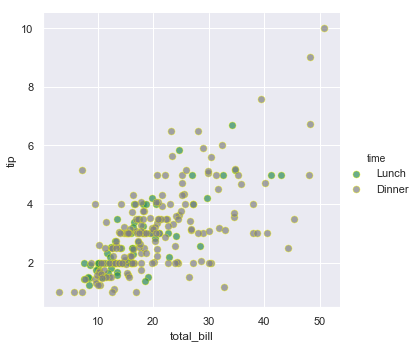

In [11]:
#指定对应分类的颜色，通过调色板赋值
pal = dict(Lunch='seagreen', Dinner='gray')
g = sns.FacetGrid(tips, hue='time', palette=pal, size =5)
g.map(plt.scatter, 'total_bill', 'tip', s =50, alpha=.7, 
      linewidth=.5, edgecolor='yellow')
g.add_legend()
#print(help(plt))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


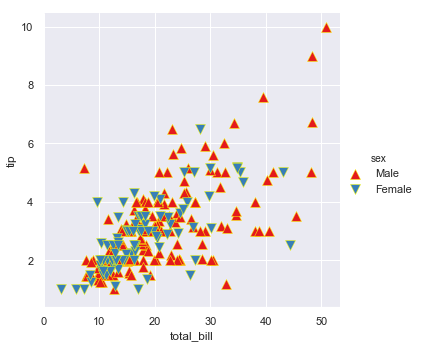

In [13]:
#修改数据中展示的形状
g = sns.FacetGrid(tips, hue='sex', palette='Set1', size =5,
                  hue_kws={'marker':['^','v']})
g.map(plt.scatter, 'total_bill', 'tip', s =100,
      linewidth=.5, edgecolor='yellow')
g.add_legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


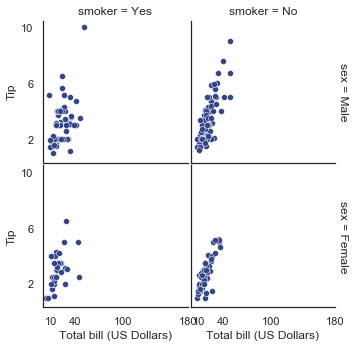

In [29]:
with sns.axes_style('white'):
    g = sns.FacetGrid(tips, row='sex', col='smoker', margin_titles=True, size=2.5)
g.map(plt.scatter, 'total_bill', 'tip', color='#334488', edgecolor='white', lw=.5)
#指定坐标轴的名称
g.set_axis_labels('Total bill (US Dollars)', 'Tip')
#指定坐标轴的刻度和值的取值范围
g.set(xticks=[10,40,100,180], yticks=[2,6,10])
#子图之间的间隔
g.fig.subplots_adjust(wspace=.02, hspace=.02)
#g.fig.subplots_adjust(left=0.125,right=0.9, bottom=.1 ,top=0.9, wspace=.02, hspace=.02)

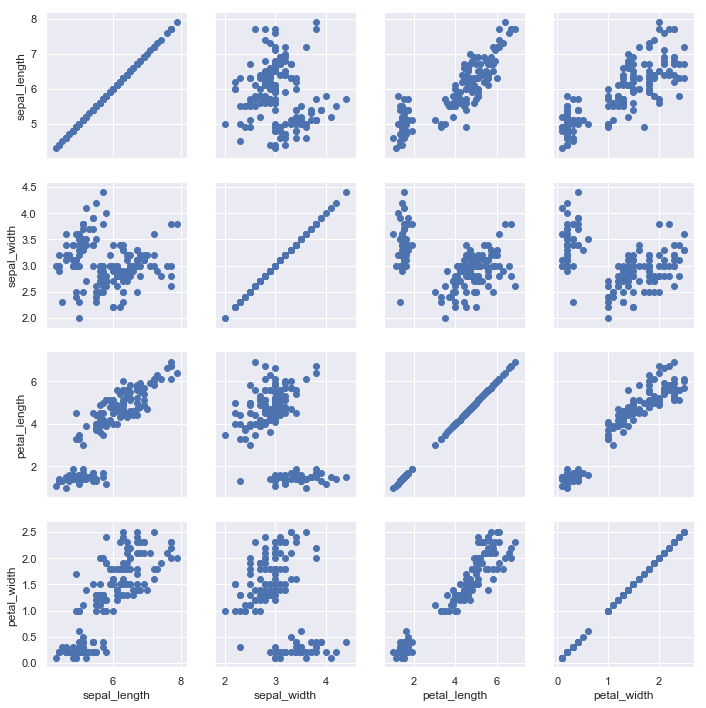

In [76]:
#之前绘制的pairgrid中单变量采用的是条形图展示
iris = sns.load_dataset('iris')
g = sns.PairGrid(iris)
g.map(plt.scatter)

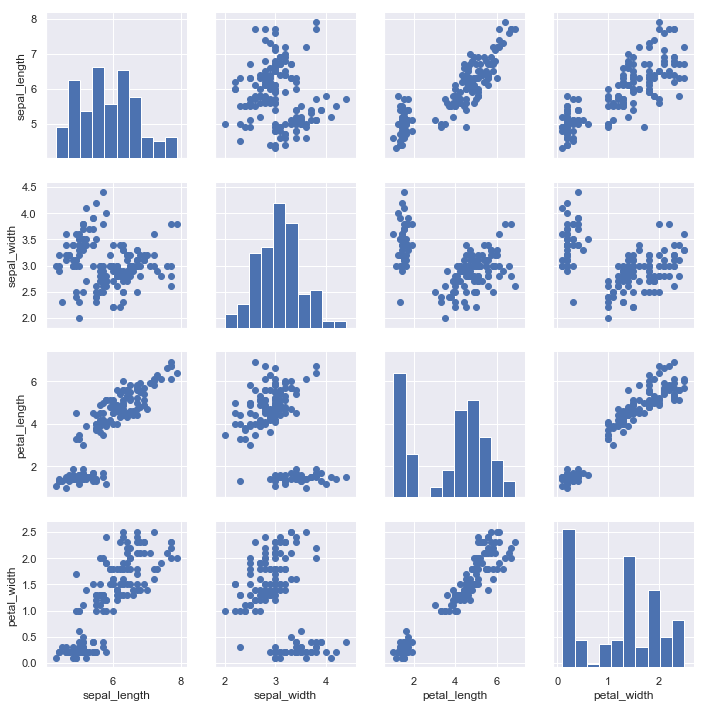

In [31]:
g = sns.PairGrid(iris)
#指定对角线上条形图，飞对角线采用繁点图
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

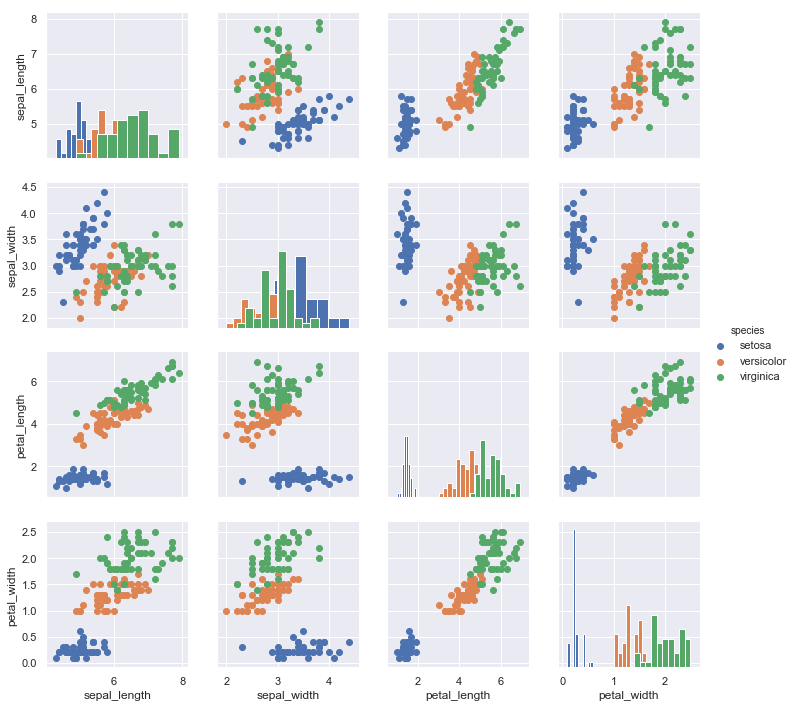

In [32]:
g = sns.PairGrid(iris, hue='species')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

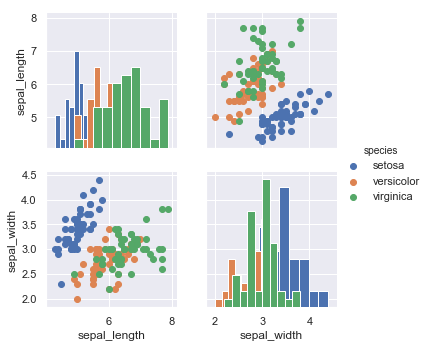

In [35]:
g = sns.PairGrid(iris, vars=['sepal_length','sepal_width'], hue='species')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

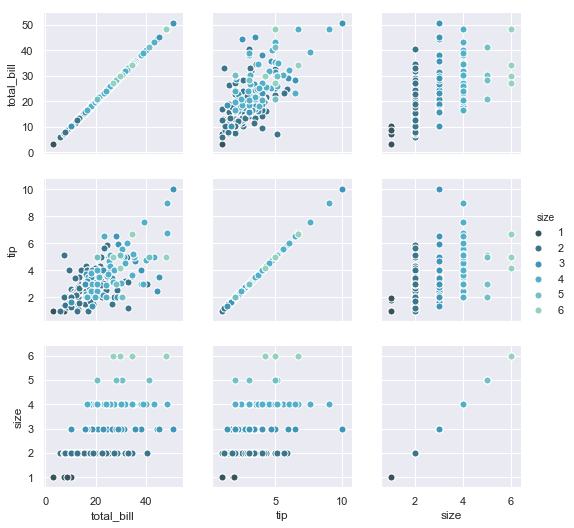

In [40]:
#g = sns.PairGrid(iris, hue='species', palette = 'GnBu_d')
#g.map_diag(plt.hist)
#g.map_offdiag(plt.scatter)
#g.add_legend()
#plt.show()

g = sns.PairGrid(tips, hue='size', palette = 'GnBu_d')
g.map(plt.scatter, s=50, edgecolor='white')
g.add_legend()

热度图 heatmap

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
import seaborn as sns
sns.set()

[[0.38344152 0.79172504 0.52889492]
 [0.56804456 0.92559664 0.07103606]
 [0.0871293  0.0202184  0.83261985]]


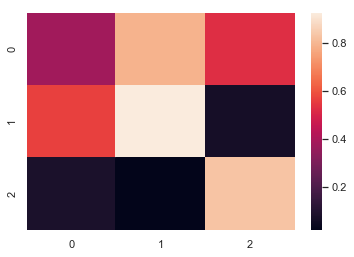

In [43]:
uniform_data = np.random.rand(3,3)
print(uniform_data)
heatmap =sns.heatmap(uniform_data)

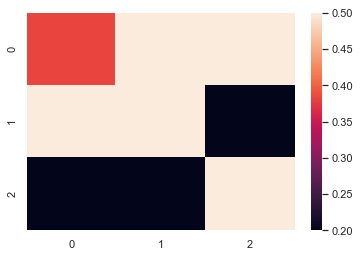

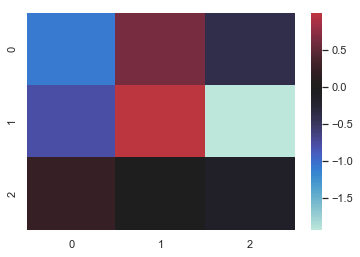

In [48]:
#设置热度图取值的上下限
ax = sns.heatmap(uniform_data, vmin=.2, vmax=.5)
plt.show()
#当数据存在负数时，可以指定中间值
normal_data = np.random.randn(3,3)
ax = sns.heatmap(normal_data, center = 0)

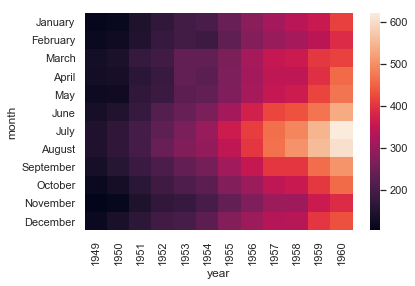

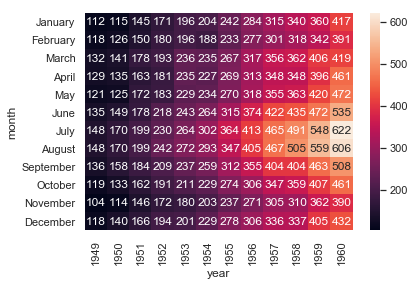

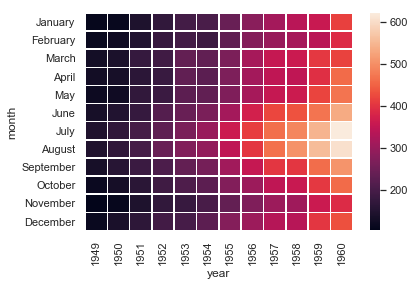

In [67]:
#读入航班乘客数据集 记录某年某月内乘坐飞机乘客的数量
flights = sns.load_dataset('flights')

#数据集坐标的转换
#pivot(‘index=xx’,’columns=xx’,’values=xx’)
#pivot(‘索引列’，‘列名’，‘值’)。
flights = flights.pivot('month','year','passengers')
ax = sns.heatmap(flights)
plt.show()
ax = sns.heatmap(flights, annot=True, fmt='d')
plt.show()
#flights = sns.load_dataset('flights')
#flights = flights.pivot('year','month','passengers')
#在热度图中显示实际值
#ax = sns.heatmap(flights, annot=True, fmt='d')
#plt.show()

ax = sns.heatmap(flights, linewidth=.5)

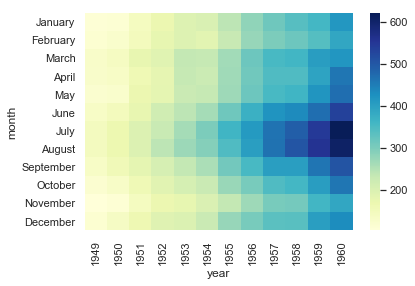

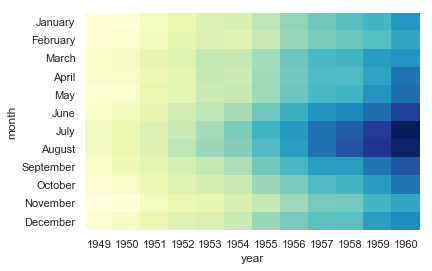

In [74]:
#指定热度图颜色
ax = sns.heatmap(flights, cmap='YlGnBu')
plt.show()

#隐藏color bar
ax = sns.heatmap(flights, cmap='YlGnBu',cbar=False)
#使用pandas可以求出两种属性的相关系数特征，然后使用热度图展示